## CIFAR-10 Classification w/ Tensor Flow
#### Landon Buell - July 2023

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [16]:
# Load the Dataset
cifar10 = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [17]:
# Define the names of each class
CLASS_NAMES = ["Plane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [62]:
def oneHotEncode(labels,numClasses):
    """ One-Hote encode a vector of samples """
    oneHot = np.zeros(shape=(labels.size,numClasses),dtype=np.uint8)
    for ii,tgt in enumerate(labels):
        oneHot[ii,tgt] = 1
    return oneHot

In [18]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [19]:
# Preprocess the training images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [70]:
y_train_one_hot = oneHotEncode(y_train,len(CLASS_NAMES))

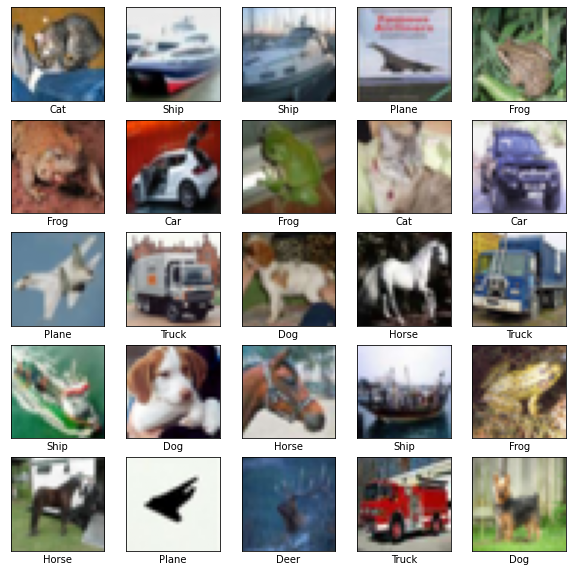

In [31]:
plt.figure(figsize=(10,10))
for ii in range(25):
    plt.subplot(5,5,ii+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[ii], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[y_test[ii,0]])
plt.show()

In [89]:
model = tf.keras.models.Sequential()

# 1st layer group
model.add( tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),activation='relu',input_shape=(32,32,3)) )
model.add( tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),activation='relu') )
model.add( tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)) )

# 2nd layer group
#model.add( tf.keras.layers.Conv2D(filters=4,kernel_size=(3,3),strides=(2,2),activation='relu') )
#model.add( tf.keras.layers.Conv2D(filters=4,kernel_size=(3,3),strides=(2,2),activation='relu') )
#model.add( tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)) )

# Flatten -> Dense
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense(units=256,activation='relu') )
model.add( tf.keras.layers.Dense(units=128,activation='relu') )
model.add( tf.keras.layers.Dense(units=64,activation='relu') )
model.add( tf.keras.layers.Dense(units=len(CLASS_NAMES),activation='softmax') )


In [90]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 15, 15, 32)        896       
                                                                 
 conv2d_39 (Conv2D)          (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 288)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               73984     
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                     

In [92]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[   tf.keras.metrics.Accuracy(),
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall()])

In [93]:
# Setup a callback

class TensorflowTrainModelCallback(tf.keras.callbacks.Callback):
    """ Callback to use during training """
    
    def __init__(self):
        """ Constructor """
        super().__init__()
        self._lossCurve = np.array([],dtype=np.float32)
        
    def on_train_batch_end(self,batchIndex,batchLog):
        """ After train batch is done """
        self._lossCurve = np.append(self._lossCurve,batchLog["loss"])
        return None
    
    def getLossCurve(self):
        """ Return the loss curve """
        return self._lossCurve
        

In [94]:
# Isolate small training Subset
first10kImages = X_train[:10000]
first10kLabels = y_train[:10000]

first10kLabelsOneHot = oneHotEncode(first10kLabels,len(CLASS_NAMES))

In [95]:
# Train the Model?
trainCallback = TensorflowTrainModelCallback()
trainHistory = model.fit( x=X_train,
                          y=y_train_one_hot,
                          batch_size=100,
                          epochs=4,
                          callbacks=trainCallback)

Epoch 1/4
500/500 [==============================] - 18s 33ms/step - loss: 1.7107 - accuracy: 0.0000e+00 - precision_5: 0.6414 - recall_5: 0.1140
Epoch 2/4
500/500 [==============================] - 16s 32ms/step - loss: 1.4187 - accuracy: 0.0000e+00 - precision_5: 0.6797 - recall_5: 0.2636 6s - loss: 1.4520 - accuracy: 0.0000e+00 - precision_5: 0.6700 - recall_5:  - ETA: 6s - loss: 1.4463 - accuracy: 0.0000e+00 - precision_5: 0.6718 - recall_5: 0.24 - ETA: 6s - loss: 1.4466 - accuracy: 0.0000e+00 - prec - ETA: 4s - loss: 1.4390 - accuracy: 0.0000e+00 - precision_5: 0.6741 - recall_5 - ETA: 3s - loss: 1.4370 - accuracy: 0.0000e+00 - precisio - ETA: 1s - loss: 1.4262 - accuracy: 0.0000e+00 - precision_5
Epoch 3/4
500/500 [==============================] - 16s 32ms/step - loss: 1.2870 - accuracy: 0.0000e+00 - precision_5: 0.7054 - recall_5: 0.3473
Epoch 4/4
500/500 [==============================] - 16s 32ms/step - loss: 1.1941 - accuracy: 0.0000e+00 - precision_5: 0.7233 - recall_5: 0.4

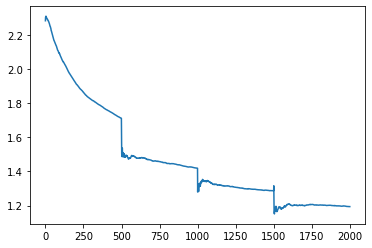

In [96]:
lossCurve = trainCallback.getLossCurve()
plt.plot(lossCurve)
plt.show()